In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Abstract
This assignment is studying one of two curve-fitting methods, namely least-squares regression. This method assumes that the entry data has some errors(or noise), therefore does not strives to fit every single data entry on a curve. The purpose of first part of this study was to compare different regression methods on a given dataset. In the end saturation-growth-rate equation fitted the data the best. In the second part of experiment linear regression was used to fit a function of two variables.

#Introduction
This assignment consists of 2 parts

In Part 1 least-squares regression is used to fit a function of one variable using:
* linear regression
* power eqaution
* saturation-growth-rate equation
* parabolic equation

Then results are graphed and compared with each other. 

Im Part 2 linear least-squares regression is used to fit a function of 2 variables, and obtain coefficients, standard error of estimate and correlation coefficient.

#Methods
For each method we need two quantities that define how well a method fits the data.

First one is standard error of estimate:

$$S_{y/x}=\sqrt{\frac{S_r}{n-2}}$$

Where $S_r=\sum_{i=1}^n(y_i-f(x_i))^2$ and $f(x)$ is a curve that fits the data and is derived using regression.

Second one is coefficient of correlation:

$$r=1-\frac{S_r}{S_t}$$

Where $S_t=\sum_{i=1}^n (y-\bar{y})^2$
##Linear regression
The goal of linear regression is to fit given data using straight line $y=a_0+a_1x$

Those coefficients are given as:
$$a_1=\frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2}$$

$$a_0=\bar{y}-a_1\bar{x}$$

Where $\bar{x}$ and $\bar{y}$ are mean values of $x$ and $y$ respectively. 

In [2]:
def linear(x,y):
  n=len(x)
  a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
  a0=1/n*(sum(y)-a1*sum(x))
  sr=sum((y-a0-a1*x)**2)
  std=np.sqrt(sr/(n-2))
  mean=np.average(y)
  st=sum((y-mean)**2)
  r=np.sqrt(1-sr/st)
  return a0+a1*x,std,r

##Power equation

The curve we want to find is $y=\alpha x^{\beta}$
After taking logarithm this is reduced to a linear regression that we know how to solve:

$$\tilde{y}=a_0+a_1\tilde{x}$$

Where $\tilde{y}=ln(y)$,$a_0=ln(\alpha)$,$a_1=\beta$ and $\tilde{x}=ln(x)$

In [3]:
def power(x,y):
  n=len(x)
  yt=np.log(y)
  xt=np.log(x)
  a1=(n*sum(xt*yt)-sum(xt)*sum(yt))/(n*sum(xt**2)-sum(xt)**2)
  a0=1/n*(sum(yt)-a1*sum(xt))
  alpha=np.exp(a0)
  beta=a1
  sr=sum((y-alpha*x**beta)**2)
  std=np.sqrt(sr/(n-2))
  mean=np.average(y)
  st=sum((y-mean)**2)
  r=np.sqrt(1-sr/st)
  return alpha*x**beta,std,r

##Saturation-growth-rate equation
This equation looks like $y=\frac{\alpha x}{\beta+x}$
It can also be expressed as a linear equation:
$$\tilde{y}=a_0+a_1\tilde{x}$$

Where $\tilde{y}=1/y$, $\tilde{x}=1/x$, $a_0=1/\alpha$ and $a_1=\frac{\beta}{\alpha}$

In [4]:
def saturation(x,y):
  n=len(x)
  yt=1/y
  xt=1/x
  a1=(n*sum(xt*yt)-sum(xt)*sum(yt))/(n*sum(xt**2)-sum(xt)**2)
  a0=1/n*(sum(yt)-a1*sum(xt))
  alpha=1/a0
  beta=a1*alpha
  sr=sum((y-alpha*x/(beta+x))**2)
  std=np.sqrt(sr/(n-2))
  mean=np.average(y)
  st=sum((y-mean)**2)
  r=np.sqrt(1-sr/st)
  return alpha*x/(beta+x),std,r

##Parabolic equation

This equation os similar to linear one, but has an additional coefficient: $y=a_0+a_1x+a_2x^2$

In order to find coefficients we need to solve a linear system of equations:

$$
\begin{gather}
\begin{bmatrix}
n & \sum x_i & \sum x_i^2\\
\sum x_i & \sum x_i^2 & \sum x_i^3\\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}=
\begin{bmatrix}
\sum y_i\\
\sum x_iy_i\\
\sum x_i^2y_i
\end{bmatrix}
\end{gather}
$$

In [5]:
def parabolic(x,y):
  n=len(x)
  A=np.zeros((3,3))
  A[0,0]=n
  A[0,1]=sum(x)
  A[1,0]=A[0,1]
  A[0,2]=sum(x**2)
  A[2,0]=A[0,2]
  A[1,1]=A[0,2]
  A[1,2]=sum(x**3)
  A[2,1]=A[1,2]
  A[2,2]=sum(x**4)
  b=np.zeros(3)
  b[0]=np.sum(y)
  b[1]=np.sum(x*y)
  b[2]=np.sum(x**2*y)
  a=np.linalg.solve(A,b)
  sr=sum((y-a[0]-a[1]*x-a[2]*x**2)**2)
  std=np.sqrt(sr/(n-3))
  mean=np.average(y)
  st=sum((y-mean)**2)
  r=np.sqrt(1-sr/st)
  return a[0]+a[1]*x+a[2]*x**2,std,r

##Multiple linear regression

This is the method for part 2. We need to fit a plane using equation: $y=a_0+a_1x_1+a_2x_2$. This method is similar to previous one, where we also need to solve a system of linear equations: 

$$
\begin{gather}
\begin{bmatrix}
n & \sum x_{1i} & \sum x_{2i}\\
\sum x_{1i} & \sum x_{1i}^2 & \sum x_{1i}x_{2i}\\
\sum x_{2i} & \sum x_{1i}x_{2i} & \sum x_{2i}^2
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}=
\begin{bmatrix}
\sum y_i\\
\sum x_{1_i}y_i\\
\sum x_{2_i}y_i
\end{bmatrix}
\end{gather}
$$

In [6]:
def multiple(x1,x2,y):
  n=len(y)
  A=np.zeros((3,3))
  A[0,0]=n
  A[0,1]=sum(x1)
  A[1,0]=A[0,1]
  A[0,2]=sum(x2)
  A[2,0]=A[0,2]
  A[1,1]=sum(x1**2)
  A[1,2]=sum(x1*x2)
  A[2,1]=A[1,2]
  A[2,2]=sum(x2**2)
  b=np.zeros(3)
  b[0]=np.sum(y)
  b[1]=np.sum(x1*y)
  b[2]=np.sum(x2*y)
  a=np.linalg.solve(A,b)
  ymean=np.average(y)
  sr=sum((y-a[0]-a[1]*x1-a[2]*x2)**2)
  std=np.sqrt(sr/(n-3))
  st=sum((y-ymean)**2)
  r=np.sqrt(1-sr/st)
  return a,std,r

#Results
##Part 1




In [7]:
x=np.array([5,10,15,20,25,30,35,40,45,50])
y1=np.array([17,24,31,33,37,37,40,40,42,41])

In [8]:
lin_reg,lin_std,lin_r=linear(x,y1)
print(lin_std,lin_r)

3.485032933195115 0.9156917035433402


In [9]:
pow_reg,pow_std,pow_r=power(x,y1)
print(pow_std,pow_r)

2.164475337933126 0.9683491553096023


In [10]:
sat_reg,sat_std,sat_r=saturation(x,y1)
print(sat_std,sat_r)

0.9016015125423504 0.9945804920771856


In [11]:
par_reg,par_std,par_r=parabolic(x,y1)
print(par_std,par_r)

1.3116197316090972 0.989940741897905


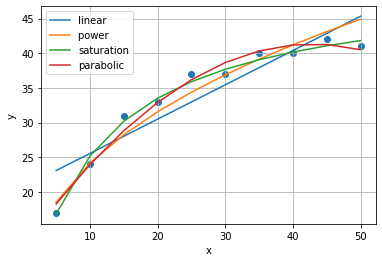

In [12]:
plt.scatter(x,y1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,lin_reg,label='linear')
plt.plot(x,pow_reg,label='power ')
plt.plot(x,sat_reg,label='saturation')
plt.plot(x,par_reg,label='parabolic')
plt.grid()
plt.legend()
plt.show()

Regression type  | Standard error of estimate, $S_{y/x}$| Coefficient of correlation, $r$
-------------------|------------------|--------
Linear       | 3.485 |0.916
Power       | 2.164 |0.968
Saturation-growth-rate|0.902|0.995
Parabolic|1.312|0.990

Saturation-growth-rate model delivers the least standard error of estimate and the highest coefficient of correlation, therefore out of the 4 methods it fits given data the best. From the scatter plot we can see that the distribution grows up to a certain point and then doesn't change. Saturation-growth-model is good for describing such cases.

##Part 2
From the results we can say that linear model gives a very good fit to this data

In [15]:
x1=np.array([0,1,1,2,2,3,3,4,4])
x2=np.array([0,1,2,1,2,1,2,1,2])
y2=np.array([15.1,17.9,12.7,25.6,20.5,35.1,29.7,45.4,40.2])
a,std,r=multiple(x1,x2,y2)
print("coefficients:")
print("a_0=",a[0])
print("a_1=",a[1])
print("a_2=",a[2])
print("standard error of estimate=",std)
print("correlation coefficient=",r)

coefficients:
a_0= 14.460869565217383
a_1= 9.025217391304354
a_2= -5.704347826086963
standard error of estimate= 0.8887868298897703
correlation coefficient= 0.9977591624531913


#Conclusion
Even though saturation-growth-rate model gave the best estimate, parabolic equation was not very far from it. If several further data points were known, and, for example we realize that the function is decreasing, than parabolic equation should give a better fit. Also, maybe for this method equations with more parameters(i.e. higher order polynomials) could provide a better fit.

#References

https://www.youtube.com/watch?v=HdZ3RuAioww
https://www.youtube.com/watch?v=ZA5QAIjP_14